В этом задании мы реализуем другую модель машинного обучения - линейный классификатор. Линейный классификатор подбирает для каждого класса веса, на которые нужно умножить значение каждого признака и потом сложить вместе. Тот класс, у которого эта сумма больше, и является предсказанием модели.
Задание 1.2 - Линейный классификатор (Linear classifier)

В этом задании вы:

потренируетесь считать градиенты различных многомерных функций
реализуете подсчет градиентов через линейную модель и функцию потерь softmax
реализуете процесс тренировки линейного классификатора
подберете параметры тренировки на практике
На всякий случай, еще раз ссылка на туториал по numpy:
http://cs231n.github.io/python-numpy-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

from dataset import load_svhn, random_split_train_val
from gradient_check import check_gradient
from metrics import multiclass_accuracy 
import linear_classifer

In [2]:
def prepare_for_linear_classifier(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(float) / 255.0
    
    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    # Add another channel with ones as a bias term
    train_flat_with_ones = np.hstack([train_flat, np.ones((train_X.shape[0], 1))])
    test_flat_with_ones = np.hstack([test_flat, np.ones((test_X.shape[0], 1))])    
    return train_flat_with_ones, test_flat_with_ones
    
train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)    
old_shape = train_X.shape
print("old shape ", old_shape)
old_test_X = test_X.copy()
train_X, test_X = prepare_for_linear_classifier(train_X, test_X)
# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)
print("train_X shape ", train_X.shape)

old shape  (10000, 32, 32, 3)
train_X shape  (9000, 3073)


In [28]:
# TODO: Implement check_gradient function in gradient_check.py
# All the functions below should pass the gradient check

def square(x):
    return float(x*x), 2*x

check_gradient(square, np.array([3.0]))

def array_sum(x):
    assert x.shape == (2,), x.shape
    return np.sum(x), np.ones_like(x)

check_gradient(array_sum, np.array([3.0, 2.0]))

def array_2d_sum(x):
    assert x.shape == (2,2)
    return np.sum(x), np.ones_like(x)

check_gradient(array_2d_sum, np.array([[3.0, 2.0], [1.0, 0.0]]))

CHECK GRADIENT
predictions is 
 [3.]
analytic grad is 
 [6.]
numeric grad array is 
 [6.]
Gradient check passed!
CHECK GRADIENT
predictions is 
 [3. 2.]
analytic grad is 
 [1. 1.]
numeric grad array is 
 [1. 1.]
Gradient check passed!
CHECK GRADIENT
predictions is 
 [[3. 2.]
 [1. 0.]]
analytic grad is 
 [[1. 1.]
 [1. 1.]]
numeric grad array is 
 [[1. 1.]
 [1. 1.]]
Gradient check passed!


True

In [27]:
# TODO Implement softmax and cross-entropy for single sample
probs = linear_classifer.softmax(np.array([-10, 0, 10]))

# Make sure it works for big numbers too!
probs = linear_classifer.softmax(np.array([1000, 0, 0]))
assert np.isclose(probs[0], 1.0)

In [26]:
probs = linear_classifer.softmax(np.array([-5, 0, 5]))
linear_classifer.cross_entropy_loss(probs, np.array([[1]]))

loss array 
 [5.00676044]


5.006760443547122

In [25]:
# TODO Implement combined function or softmax and cross entropy and produces gradient
loss, grad = linear_classifer.softmax_with_cross_entropy(np.array([1, 0, 0]), np.array([[1]]))
check_gradient(lambda x: linear_classifer.softmax_with_cross_entropy(x, np.array([[1]])), np.array([1, 0, 0], float))

loss array 
 [1.55144471]
CHECK GRADIENT
predictions is 
 [1. 0. 0.]
loss array 
 [1.55144471]
analytic grad is 
 [ 0.57611688 -0.78805844  0.21194156]
loss array 
 [1.55145048]
loss array 
 [1.55143895]
loss array 
 [1.55143683]
loss array 
 [1.55145259]
loss array 
 [1.55144683]
loss array 
 [1.55144259]
numeric grad array is 
 [ 0.57611688 -0.78805844  0.21194156]
Gradient check passed!


True

In [31]:
# TODO Extend combined function so it can receive a 2d array with batch of samples
np.random.seed(42)
# Test batch_size = 1
num_classes = 4
batch_size = 1
predictions = np.random.randint(-1, 3, size=(batch_size, num_classes)).astype(float)
target_index = np.random.randint(0, num_classes, size=(batch_size, 1)).astype(int)
check_gradient(lambda x: linear_classifer.softmax_with_cross_entropy(x, target_index), predictions)
print("END")

# Test batch_size = 3
num_classes = 4
batch_size = 3
predictions = np.random.randint(-1, 3, size=(batch_size, num_classes)).astype(float)
target_index = np.random.randint(0, num_classes, size=(batch_size, 1)).astype(int)
# print("target_index is \n", target_index)
for ind in range(target_index.size):
    check_gradient(lambda x: linear_classifer.softmax_with_cross_entropy(x, target_index[ind]), predictions[ind])
print("END")

# Make sure maximum subtraction for numberic stability is done separately for every sample in the batch
probs = linear_classifer.softmax(np.array([[20,0,0], [1000, 0, 0]]))
assert np.all(np.isclose(probs[:, 0], 1.0))
print("END")

CHECK GRADIENT
predictions is 
 [[ 1.  2. -1.  1.]]
loss array 
 [3.57972422]
analytic grad is 
 [[ 0.20603191  0.56005279 -0.97211661  0.20603191]]
loss array 
 [3.57972628]
loss array 
 [3.57972216]
loss array 
 [3.57972982]
loss array 
 [3.57971862]
loss array 
 [3.5797145]
loss array 
 [3.57973394]
loss array 
 [3.57972628]
loss array 
 [3.57972216]
numeric grad array is 
 [[ 0.20603191  0.56005279 -0.97211661  0.20603191]]
Gradient check passed!
END
CHECK GRADIENT
predictions is 
 [ 2. -1. -1.  1.]
loss array 
 [1.38352864]
analytic grad is 
 [ 0.68145256  0.03392753  0.03392753 -0.74930761]
loss array 
 [1.38353545]
loss array 
 [1.38352182]
loss array 
 [1.38352898]
loss array 
 [1.3835283]
loss array 
 [1.38352898]
loss array 
 [1.3835283]
loss array 
 [1.38352115]
loss array 
 [1.38353613]
numeric grad array is 
 [ 0.68145256  0.03392753  0.03392753 -0.74930761]
Gradient check passed!
CHECK GRADIENT
predictions is 
 [0. 1. 1. 1.]
loss array 
 [1.2142833]
analytic grad is 
 [ 0

In [32]:
# TODO Implement linear_softmax function that uses softmax with cross-entropy for linear classifier
batch_size = 2
num_classes = 2
num_features = 3
np.random.seed(42)
W = np.random.randint(-1, 3, size=(num_features, num_classes)).astype(float)
X = np.random.randint(-1, 3, size=(batch_size, num_features)).astype(float)
target_index = np.ones(batch_size, dtype=int)

loss, dW = linear_classifer.linear_softmax(X, W, target_index)
check_gradient(lambda w: linear_classifer.linear_softmax(X, w, target_index), W)

loss array 
 [2.12692801 0.04858735]
CHECK GRADIENT
predictions is 
 [[ 1.  2.]
 [-1.  1.]
 [ 1.  2.]]
loss array 
 [2.12692801 0.04858735]
analytic grad is 
 [[-0.44039854  0.44039854]
 [-0.4166856   0.4166856 ]
 [ 0.46411148 -0.46411148]]
loss array 
 [2.1269192  0.04858735]
loss array 
 [2.12693682 0.04858735]
loss array 
 [2.12693682 0.04858735]
loss array 
 [2.1269192  0.04858735]
loss array 
 [2.1269192  0.04858783]
loss array 
 [2.12693682 0.04858688]
loss array 
 [2.12693682 0.04858688]
loss array 
 [2.1269192  0.04858783]
loss array 
 [2.12693682 0.04858783]
loss array 
 [2.1269192  0.04858688]
loss array 
 [2.1269192  0.04858688]
loss array 
 [2.12693682 0.04858783]
numeric grad array is 
 [[-0.44039854  0.44039854]
 [-0.4166856   0.4166856 ]
 [ 0.46411148 -0.46411148]]
Gradient check passed!


True

In [33]:
# TODO Implement l2_regularization function that implements loss for L2 regularization
linear_classifer.l2_regularization(W, 0.01)
check_gradient(lambda w: linear_classifer.l2_regularization(w, 0.01), W)

CHECK GRADIENT
predictions is 
 [[ 1.  2.]
 [-1.  1.]
 [ 1.  2.]]
analytic grad is 
 [[ 0.02  0.04]
 [-0.02  0.02]
 [ 0.02  0.04]]
numeric grad array is 
 [[ 0.02  0.04]
 [-0.02  0.02]
 [ 0.02  0.04]]
Gradient check passed!


True

**Тренировка!**
Градиенты в порядке, реализуем процесс тренировки!

In [ ]:
# TODO: Implement LinearSoftmaxClassifier.fit function
print("train X shape ", train_X.shape)
ind = np.array([1,5,222])
# print(train_X[ind])

classifier = linear_classifer.LinearSoftmaxClassifier()
loss_history = classifier.fit(train_X, train_y, epochs=2, learning_rate=0.0001, batch_size=300, reg=1e-5)

train X shape  (9000, 3073)
num train is  9000
num features is  3073
num classes  is  10
Epoch 0, loss: 2.302733
Epoch 0, loss: 2.302654
Epoch 0, loss: 2.302909
Epoch 0, loss: 2.303238
Epoch 0, loss: 2.302780
Epoch 0, loss: 2.303146
Epoch 0, loss: 2.302941
Epoch 0, loss: 2.303224
Epoch 0, loss: 2.303448
Epoch 0, loss: 2.302550
Epoch 0, loss: 2.302793
Epoch 0, loss: 2.302149
Epoch 0, loss: 2.302653
Epoch 0, loss: 2.302907
Epoch 0, loss: 2.303601
Epoch 0, loss: 2.303475
Epoch 0, loss: 2.303150
Epoch 0, loss: 2.302799
Epoch 0, loss: 2.303245
Epoch 0, loss: 2.303216
Epoch 0, loss: 2.302992
Epoch 0, loss: 2.302874
Epoch 0, loss: 2.302313
Epoch 0, loss: 2.303245
Epoch 0, loss: 2.302283
Epoch 0, loss: 2.302938
Epoch 0, loss: 2.302587
Epoch 0, loss: 2.303513
Epoch 0, loss: 2.301987
Epoch 0, loss: 2.302917
Linear softmax classifier test set accuracy: 8.922222
Epoch 1, loss: 2.302426
Epoch 1, loss: 2.303128
Epoch 1, loss: 2.302140
Epoch 1, loss: 2.302245
Epoch 1, loss: 2.303473
Epoch 1, loss: 2.

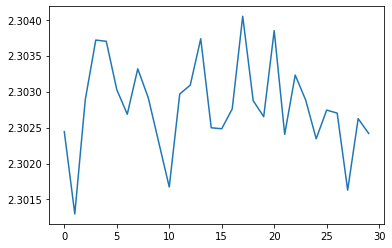

In [ ]:
# let's look at the loss history!
plt.plot(loss_history)

In [ ]:
# classifier = linear_classifer.LinearSoftmaxClassifier()
# print("features is ", test_X.shape[1])
# classifier.initW(test_X.shape[0],10)


# print("test x is ", test_X.shape)
# test_pred = classifier.predict(test_X[:10])
# print("test pred is ", test_pred)
# label = np.argmax(test_pred, axis=1)
# # print("test pred ", test_pred)
# print("label is ", label)
# # plt.imshow(old_test_X[3].astype(np.uint8))
# number = 10
# plot_index = 1
# for class_index in range(number):
#         plt.subplot(1, number, plot_index)
        
#         image = old_test_X[class_index]
#         plt.imshow(image.astype(np.uint8))
#         plt.axis('off')
#         plot_index += 1

# plt.show()
test_pred = classifier.predict(test_X)
test_pred = np.argmax(test_pred, axis=1)
print("test pred is \n", test_pred[:10])
print("test_y  is \n", test_y[:10])
test_accuracy = multiclass_accuracy(test_pred, test_y)*100
print('Linear softmax classifier test set accuracy: %f' % (test_accuracy, ))

test pred is 
 [9 9 9 8 9 9 8 3 9 9]
test_y  is 
 [2 1 3 0 2 5 0 1 7 1]
Linear softmax classifier test set accuracy: 9.600000


In [19]:
# a = np.array([[[2,3,2,1], [3,42,4,1], [3,4,2,1]], [[2,3,2,1], [3,0,4,1], [3,4,2,1]], [[2,30,2,1], [3,1,4,1], [3,4,2,1]]])
# print(a)
# print("max is \n", np.max(a, axis=2))
# print(a.ndim)


b = np.array([[2,3,2,1], [3,42,4,1], [3,4,2,1]])
indices = np.array([1,1,2])
print("range is \n",range(len(b)))
output_array = b[range(len(b)) , indices ]
# indices = indices[:, np.newaxis]
print("indices is \n", indices)
print("b is \n",b)
print("definite b is \n", output_array)
# b_max = np.max(b, axis=1)
# b_max = b_max[:, np.newaxis]
# print("b_max is \n", b_max)
# # print("b is \n",b)
# c = b - b_max
# # c = np.subtract(b, c)
# print("c is \n",c)

# sum_exps = np.sum(np.exp(b),  axis=1)
# sum_exps = sum_exps[:, np.newaxis]
# print("sum exps\n",sum_exps)
# probabilities = np.exp(b)/sum_exps
# print("probabilities\n", probabilities)
arr = np.array([[ 2., -1., -1. , 1.], [ 0.,  1. , 1. , 1.] ,[ 1.,  2. ,-1. , 2.]])
part = arr[range(len(arr)), indices]
print("part  is \n", part)
print("arr is \n", arr)
arr[range(len(arr)), indices]-=1
print("part  is \n", part)
print("new arr is \n", arr)

# print(b[range(len(b)), indices])
# a = np.array([[1,2,3], [4,5,6], [7,8,9]])
# a = a[np.arange(len(a)), [1,0,2]]
# print("a is \n", a)


range is 
 range(0, 3)
indices is 
 [1 1 2]
b is 
 [[ 2  3  2  1]
 [ 3 42  4  1]
 [ 3  4  2  1]]
definite b is 
 [ 3 42  2]
part  is 
 [-1.  1. -1.]
arr is 
 [[ 2. -1. -1.  1.]
 [ 0.  1.  1.  1.]
 [ 1.  2. -1.  2.]]
part  is 
 [-1.  1. -1.]
new arr is 
 [[ 2. -2. -1.  1.]
 [ 0.  0.  1.  1.]
 [ 1.  2. -2.  2.]]
